In [27]:
import json

import pandas as pd

In [28]:
with open('workout_data.json') as f:
    data = json.load(f)

df = pd.json_normalize(
    data, 
    record_path=['exercises', 'sets'], 
    meta=['uuid', 'routineUuid', 'start', 'end', ['exercises', 'exerciseUuid'], ['exercises', 'exerciseName'], ['exercises', 'uuid']],
    record_prefix='sets.'
)

In [29]:
df['sets.weight'] = df['sets.weight'] * 2.20462442 # convert kg to lb

df['sets.ORM'] = df['sets.weight'] / (1.0278 - 0.0278 * df['sets.repetitions']) #calculate one rep max

df['uuidDate']  = pd.to_datetime(df['start']).dt.date 

df = df.round(2)
df

,sets.repetitions,sets.minTargetRepetitions,sets.weight,sets.uuid,sets.maxTargetRepetitions,sets.comment,uuid,routineUuid,start,end,exercises.exerciseUuid,exercises.exerciseName,exercises.uuid,sets.ORM,uuidDate
0,5,5.0,275.0,99B25AB5-38D0-4336-902B-9F8EC68BD3E6,NaN,NaN,73261AAA-2D0C-4FBE-9C37-5A23BD1AD74E,CA1607AD-7CEF-4000-B2CB-90A3FFA954E7,2021-06-07T23:20:37Z,2021-06-08T00:31:27Z,E301F9A9-9516-47E3-9E77-D2C7E50B4D7A,Deadlift: Barbell,397DD12D-B382-4B2E-8B87-3F5E2CB566E8,309.41,2021-06-07
1,6,NaN,275.0,C607014B-9BFB-432C-8E8C-438B45E43EED,NaN,NaN,73261AAA-2D0C-4FBE-9C37-5A23BD1AD74E,CA1607AD-7CEF-4000-B2CB-90A3FFA954E7,2021-06-07T23:20:37Z,2021-06-08T00:31:27Z,E301F9A9-9516-47E3-9E77-D2C7E50B4D7A,Deadlift: Barbell,397DD12D-B382-4B2E-8B87-3F5E2CB566E8,319.40,2021-06-07
2,9,8.0,100.0,3505052C-ECB0-4B2C-9340-95463043D538,12.0,NaN,73261AAA-2D0C-4FBE-9C37-5A23BD1AD74E,CA1607AD-7CEF-4000-B2CB-90A3FFA954E7,2021-06-07T23:20:37Z,2021-06-08T00:31:27Z,BBD6B085-D50C-4BA5-88FA-AAD4A3737F0B,Pulldown (Overhand),B1BE9D23-5EE1-45EA-8566-28DE292C0D49,128.60,2021-06-07
3,9,8.0,100.0,45E47B04-6E88-46B6-820C-3078B7EF0832,12.0,NaN,73261AAA-2D0C-4FBE-9C37-5A23BD1AD74E,CA1607AD-7CEF-4000-B2CB-90A3FFA954E7,2021-06-07T23:20:37Z,2021-06-08T00:31:27Z,BBD6B085-D50C-4BA5-88FA-AAD4A3737F0B,Pulldown (Overhand),B1BE9D23-5EE1-45EA-8566-28DE292C0D49,128.60,2021-06-07
4,8,8.0,100.0,5811CF51-1263-4066-9C16-5105739624AA,12.0,NaN,73261AAA-2D0C-4FBE-9C37-5A23BD1AD74E,CA1607AD-7CEF-4000-B2CB-90A3FFA954E7,2021-06-07T23:20:37Z,2021-06-08T00:31:27Z,BBD6B085-D50C-4BA5-88FA-AAD4A3737F0B,Pulldown (Overhand),B1BE9D23-5EE1-45EA-8566-28DE292C0D49,124.16,2021-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,12,8.0,40.0,7FB921F6-81CE-4289-8FF5-35E0CD9C694E,12.0,NaN,1C12AD6C-C81B-45B8-B778-4DD985F0823D,02E6DEE6-4958-4F6E-B7D2-3AECE3F79C49,2020-10-27T11:10:19Z,2020-10-27T11:58:06Z,4A5CE1F5-EF10-436C-8ACB-1D6D5928AEC3,Calf Raise: Machine (Standing),C03773CF-EF26-4AF4-8C47-C4D734582535,57.62,2020-10-27
3282,12,8.0,40.0,11DD0CDA-C9E4-4760-8555-A359D162AE86,12.0,NaN,1C12AD6C-C81B-45B8-B778-4DD985F0823D,02E6DEE6-4958-4F6E-B7D2-3AECE3F79C49,2020-10-27T11:10:19Z,2020-10-27T11:58:06Z,4A5CE1F5-EF10-436C-8ACB-1D6D5928AEC3,Calf Raise: Machine (Standing),C03773CF-EF26-4AF4-8C47-C4D734582535,57.62,2020-10-27
3283,12,8.0,10.0,4B0FC08A-4C21-44B5-B759-62E293DDB011,12.0,NaN,1C12AD6C-C81B-45B8-B778-4DD985F0823D,02E6DEE6-4958-4F6E-B7D2-3AECE3F79C49,2020-10-27T11:10:19Z,2020-10-27T11:58:06Z,25B6655E-895A-41CB-835A-247A3A7B2E0F,Leg Curl (Lying),13BF3AE6-76DF-4D41-B52A-82C681192CB0,14.41,2020-10-27
3284,12,8.0,15.0,33056D73-6F75-404A-ABCF-81F30BDC992E,12.0,NaN,1C12AD6C-C81B-45B8-B778-4DD985F0823D,02E6DEE6-4958-4F6E-B7D2-3AECE3F79C49,2020-10-27T11:10:19Z,2020-10-27T11:58:06Z,25B6655E-895A-41CB-835A-247A3A7B2E0F,Leg Curl (Lying),13BF3AE6-76DF-4D41-B52A-82C681192CB0,21.61,2020-10-27


# Squat

<AxesSubplot:xlabel='uuidDate'>

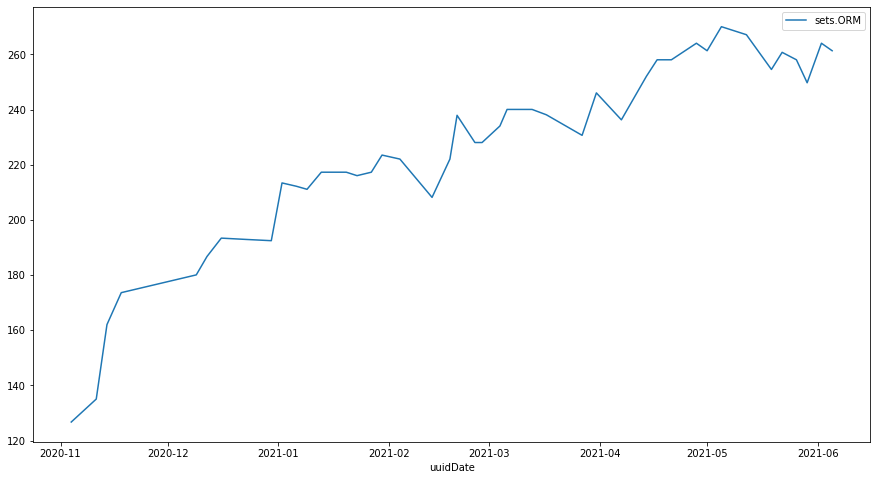

In [30]:
df_squat = df[df['exercises.exerciseUuid'] == '2339F5BD-2E8C-4446-B1A5-6156B1192229']
df_squat_orm = df_squat.groupby(by='uuid').max()

df_squat_orm.plot.line(x='uuidDate', y='sets.ORM', figsize=(15, 8))

# Deadlift

<AxesSubplot:xlabel='uuidDate'>

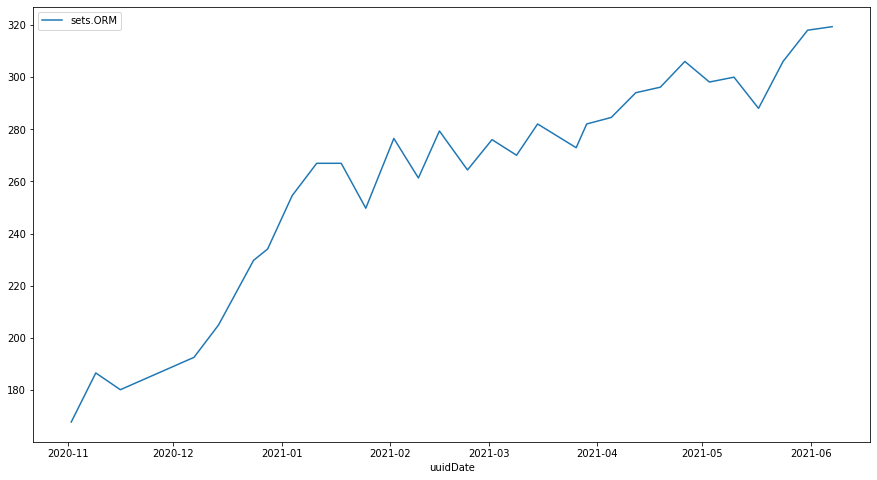

In [31]:
df_deadlift = df[df['exercises.exerciseUuid'] == 'E301F9A9-9516-47E3-9E77-D2C7E50B4D7A']
df_deadlift_orm = df_deadlift.groupby(by='uuid').max()

df_deadlift_orm.plot.line(x='uuidDate', y='sets.ORM', figsize=(15, 8))

# Bench Press

<AxesSubplot:xlabel='uuidDate'>

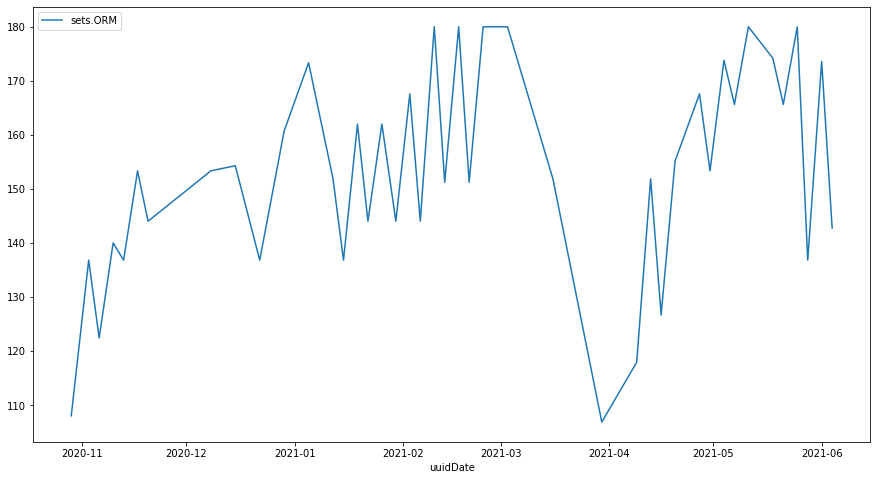

In [32]:
df_bench = df[df['exercises.exerciseUuid'] == 'C0D3C3CD-9F1F-4A89-B845-DAB5923B22A7']
df_bench_orm = df_bench.groupby(by='uuid').max()

df_bench_orm.plot.line(x='uuidDate', y='sets.ORM', figsize=(15, 8))

# Overhead Press

<AxesSubplot:xlabel='uuidDate'>

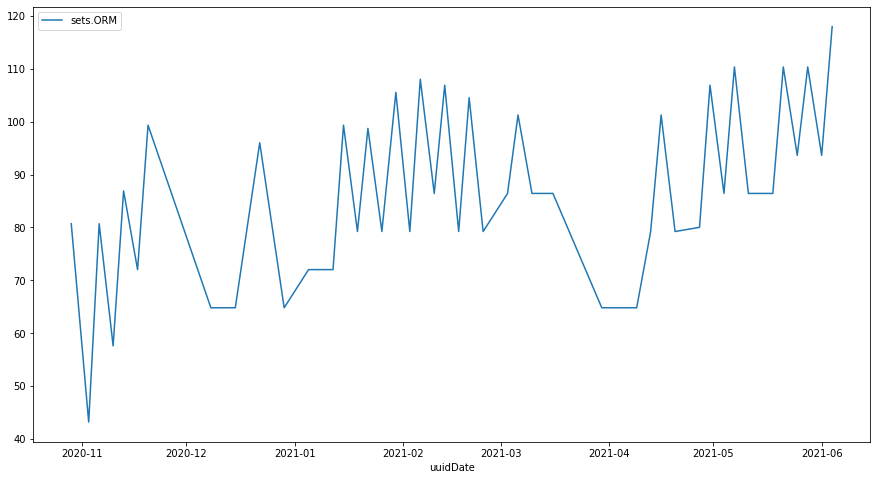

In [33]:
df_ohp = df[df['exercises.exerciseUuid'] == '3D405857-F1A8-4F85-858C-231F0CEF653A']
df_ohp_orm = df_ohp.groupby(by='uuid').max()

df_ohp_orm.plot.line(x='uuidDate', y='sets.ORM', figsize=(15, 8))

# Bent Over Row

<AxesSubplot:xlabel='uuidDate'>

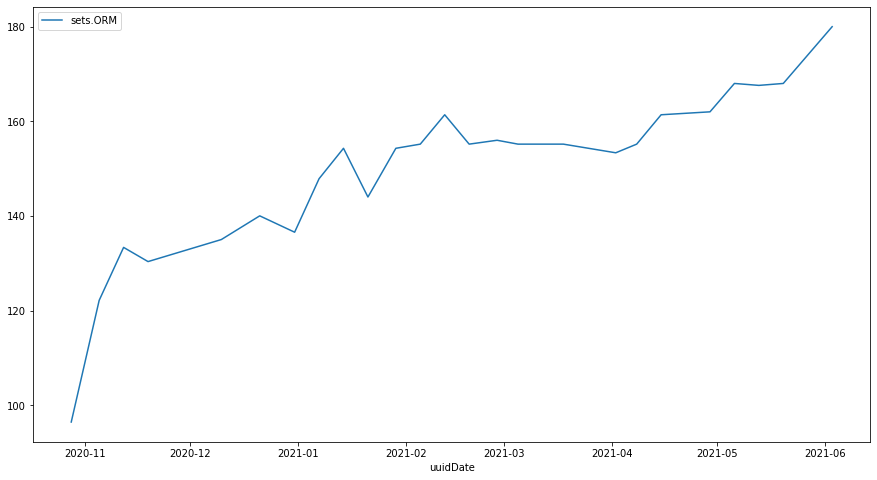

In [34]:
df_row = df[df['exercises.exerciseUuid'] == '6EB5B9C9-C953-459E-AFDE-2D31B1BEFAE0']
df_row_orm = df_row.groupby(by='uuid').max()

df_row_orm.plot.line(x='uuidDate', y='sets.ORM', figsize=(15, 8))